<a href="https://colab.research.google.com/github/kevirui/Clasificacion-de-modelos-y-metricas/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/kevirui/Clasificacion-de-modelos-y-metricas/refs/heads/main/diabetes.csv")
data

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0


In [26]:
x = data.drop(columns='diabetes', axis=1)
y = data['diabetes']

In [27]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size=0.05, stratify=y, random_state=42)
x_val, x_train, y_val, y_train = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3)
forest = RandomForestClassifier(max_depth=2)

tree.fit(x_train, y_train)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

In [34]:
tree.score(x_train, y_train)

0.8404255319148937

In [35]:
tree.score(x_val, y_val)

0.625

In [36]:
forest.score(x_train, y_train)

0.8191489361702128

In [37]:
forest.score(x_val, y_val)

0.7035714285714286

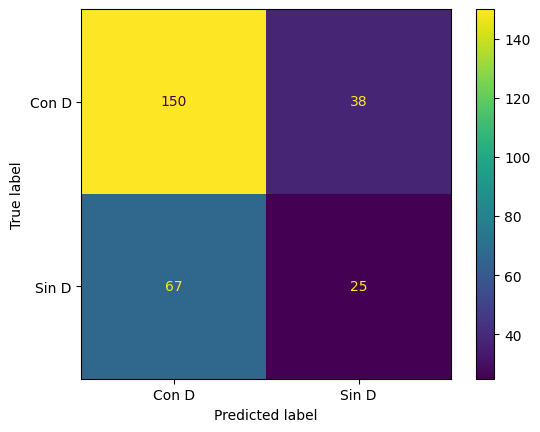

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_val, tree.predict(x_val), display_labels=['Con D', 'Sin D'])

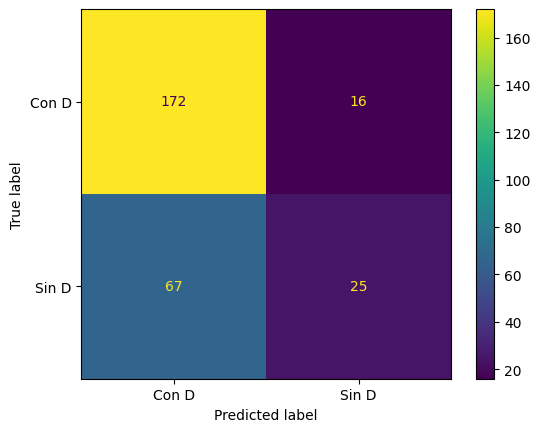

In [42]:
ConfusionMatrixDisplay.from_predictions(y_val, forest.predict(x_val), display_labels=['Con D', 'Sin D'])